Setup and loading data

In [1]:
import pandas as pd          # pandas is an important library for data analysis as it allows us to use data frames; you can think of data frame
                             # as a table (hence, composed of rows and columns); 
                             # for more on pandas, see https://pandas.pydata.org/docs/getting_started/index.html#getting-started
#import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
                             

Setup Complete


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import altair as alt
from altair import datum
import numpy as np

In [9]:
# Configuring plotting visual and sizes
# sns.set_style("whitegrid")
# sns.set_context("talk")
# params = {
#     "legend.fontsize": "x-large",
#     "figure.figsize": (30, 10),
#     "axes.labelsize": "x-large",
#     "axes.titlesize": "x-large",
#     "xtick.labelsize": "x-large",
#     "ytick.labelsize": "x-large",
# }
# plt.rcParams.update(params)

UPLOAD EXCEL PROVIDED DATASET AFTER CSV CONVERSION

In [10]:
bike_filepath = "bike_sharing.csv"

# Read the file into a data frame called iris_data (think of data frames a kind of table or like an Excel spreadsheet)
bike_data = pd.read_csv(bike_filepath) # note the index column in the file is labelled "Id",
                                                       # which is why we are using that label as the second argument

What does the data look like?


In [11]:
bike_data.head() # top five records of the file

year  month  day  hour  ...  precip  precipaccum weather  rental
0  2016     10    1     0  ...     0.0          0.0       3     103
1  2016     10    1     1  ...     0.0          0.0       3      63
2  2016     10    1     2  ...     0.0          0.0       3      33
3  2016     10    1     3  ...     0.1          0.0       3      23
4  2016     10    1     4  ...     0.0          0.0       3      11

[5 rows x 17 columns]

In [12]:
bike_data.columns

Index(['year', 'month', 'day', 'hour', 'member', 'weekend', 'season',
       'temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'weather', 'rental'],
      dtype='object')

In [13]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


In [14]:
bike_data.describe()

year         month  ...       weather        rental
count  17466.000000  17466.000000  ...  17466.000000  17466.000000
mean    2017.246822      6.522902  ...      1.774820    420.144910
std        0.662303      3.451445  ...      0.703245    402.473513
min     2016.000000      1.000000  ...      1.000000      0.000000
25%     2017.000000      4.000000  ...      1.000000     77.000000
50%     2017.000000      7.000000  ...      2.000000    315.500000
75%     2018.000000     10.000000  ...      2.000000    634.000000
max     2018.000000     12.000000  ...      4.000000   2038.000000

[8 rows x 16 columns]

CREATE A WORDCLOUD OF DOCUMENT INFORMATION TO HIGHLIGHT IMPORTANT KEY WORDS

Extract Text

In [15]:
!pip install pdfminer

     |████████████████████████████████| 4.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.9 MB 21.5 MB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140093 sha256=843157c406b2283fadb03e42170592419a2a0d8e2da1a77b7e1a74f9045888d5
  Stored in directory: /root/.cache/pip/wheels/e3/5e/f4/d210b46e9e4a28229ea070ed5b3efa92c3c29d1a7918dd4b97
Successfully built pdfminer


In [16]:
#importing packages
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#defining function 
#reference: http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=False):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function and printing text
text = extract_text_from_pdf(r'bike_case.pdf')
print(text)

 9B21E008   CAPITAL BIKESHARE: ANALYZING BIKE RENTAL DEMAND   Abby Xiong wrote this case under the supervision of Joe Naoum-Sawaya solely to provide material for class discussion. The authors do not intend to illustrate either effective or ineffective handling of a managerial situation. The authors may have disguised certain names and other identifying information to protect confidentiality.  This publication may not be transmitted, photocopied, digitized, or otherwise reproduced in any form or by any means without the permission of the copyright holder. Reproduction of this material is not covered under authorization by any reproduction rights organization. To order copies or request permission to reproduce materials, contact Ivey Publishing, Ivey Business School, Western University, London, Ontario, Canada, N6G 0N1; (t) 519.661.3208; (e) cases@ivey.ca; www.iveycases.com. Our goal is to publish materials of the highest quality; submit any errata to publishcases@ivey.ca. i1v2e5y5pubs  

Text Preprocessing

In [17]:
#importing packeges for cleaning
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")

#--------------------------------------------------------------------------------------

#removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#--------------------------------------------------------------------------------------
#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#--------------------------------------------------------------------------------------

#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#--------------------------------------------------------------------------------------

#removing very common words
#reference: https://gist.github.com/sebleier/554280

stop_words = stopwords.words('english') + ["publishcaseivey","ivey","business", "school","authorization", "reproduction", "rights", "organization", "copies","publishing","authorized","youssef","badawy","indu6611", "applied","industrial","analytics","concordia","university","outside","parameters","copyright","violation","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#executing function
# text = np.vectorize(remove_stopwords)(text)
text = np.char.lower(text)
text = text.tolist()

tokenizer = RegexpTokenizer(r'\w+')
tokenized_sent = tokenizer.tokenize(text)
tokenized_sent

words = tokenized_sent
processed_text = [word for word in words if word not in stop_words]
words = (" ").join(processed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Wordcloud

In [18]:
import cv2
import numpy as np

img = cv2.imread('bike_silhouette.png')
img[img != 0] = 255 # change everything to white where pixel is not black
cv2.imwrite('bike_silhouette.png', img)

True

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

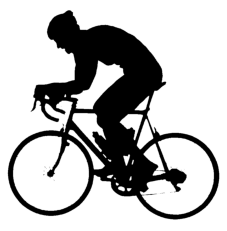

In [19]:
#importing packages
from os import path
from PIL import Image

#--------------------------------------------------------------------------------------

#setting mask image
mask = np.array(Image.open('bike_silhouette.png'))
plt.imshow(mask)
plt.axis("off")
mask

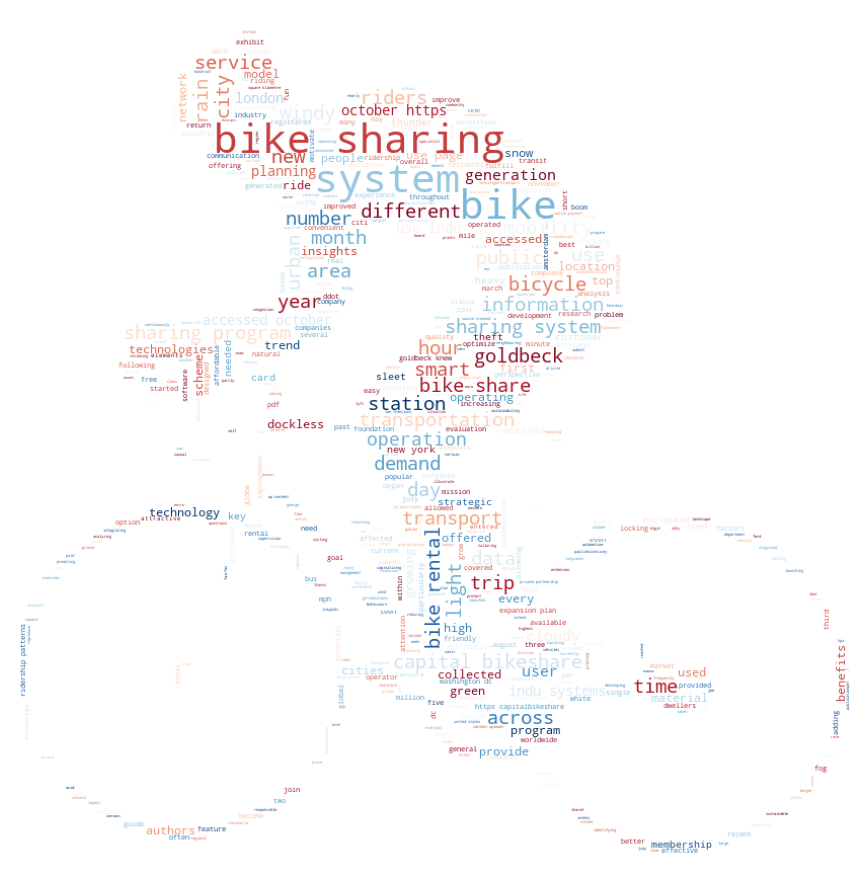

In [20]:
#importing packages
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#--------------------------------------------------------------------------------------


# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000, colormap="RdBu_r",contour_color="#5d0f24", max_words=10000,relative_scaling = 0, background_color = "white").generate(words)
# image_colors = ImageColorGenerator(mask)
# plt.figure(figsize=[20,15])
# plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")
# _=plt.show()

plt.figure(figsize=(30,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('myimage.svg', format='svg', dpi=1200)
# plt.close()

# Analysis of Data

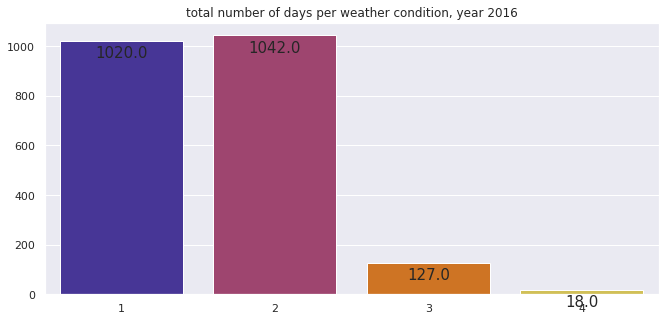

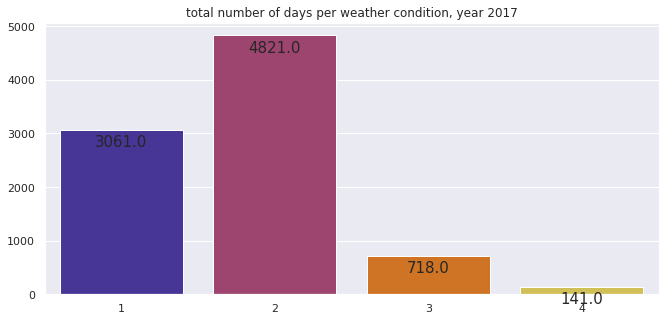

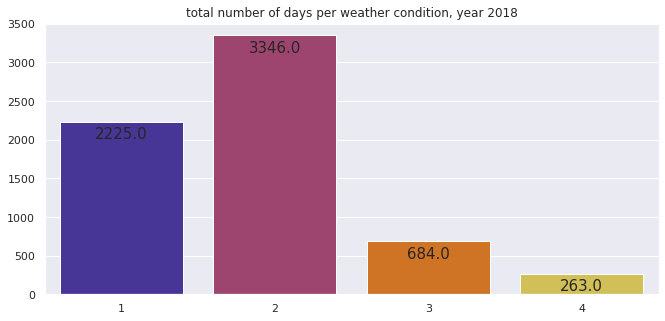

In [21]:
years = {}
for i in bike_data["year"].unique():
  years[i]= bike_data["weather"][bike_data["year"]==i].value_counts()
  plt.figure(figsize=(11,5))
  splot = sns.barplot(x=years[i].index, y=years[i].values, data=years[i].reset_index(),palette="CMRmap", ci=None)
  # plt.xlabel('Weather Condition')
  # plt.ylabel('Total nnumber of days')
  for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
  plt.title('total number of days per weather condition, year '+str(i))
  plt.show()
  # plt.savefig(f'bar_weather_seasons{i}.svg', format='svg', dpi=1200)
  # plt.close()

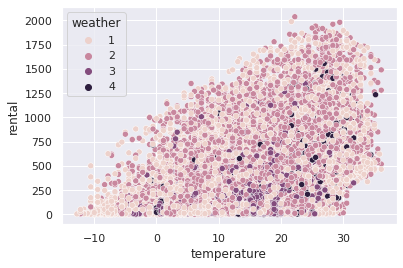

In [22]:
sns.scatterplot(data=bike_data, x="temperature", y="rental", hue="weather")

In [23]:
bike_data.head()

year  month  day  hour  ...  precip  precipaccum weather  rental
0  2016     10    1     0  ...     0.0          0.0       3     103
1  2016     10    1     1  ...     0.0          0.0       3      63
2  2016     10    1     2  ...     0.0          0.0       3      33
3  2016     10    1     3  ...     0.1          0.0       3      23
4  2016     10    1     4  ...     0.0          0.0       3      11

[5 rows x 17 columns]

In [24]:
ax = sns.catplot(x="hour",y="rental",kind="point", data=bike_data, height=11, aspect=11.7/8.27, hue='weather',palette="CMRmap",fontsize=50, legend=False)
# plt.legend(loc='upper right',bbox_to_anchor=(1.1,0.5))
plt.xlabel('Hour',fontsize=25)
plt.ylabel('Total number of bikes rented',fontsize=20)
plt.title('Hourly vs Weather Conditions & Rentals',fontsize=25)
plt.legend(title = "Weather Condition", 
           fontsize = 'large', title_fontsize = "10")
# plt.show()
plt.savefig('Hourly_Weather_Conditions_Rentals.svg', bbox_inches='tight', format='svg', dpi=1200)
plt.close()


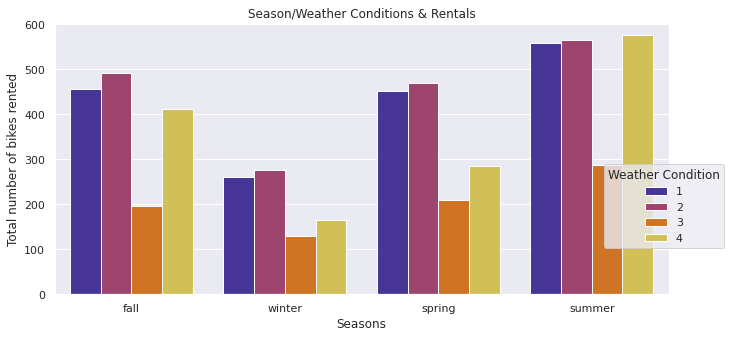

In [25]:
# seasonal_count =bike_data["weather"][bike_data["year"]==i].value_counts()
sns.set(font_scale=1)
plt.figure(figsize=(11,5))
sns.barplot(x="season",y="rental", data=bike_data,hue='weather',palette="CMRmap", ci=None)
plt.legend(title="Weather Condition", loc='upper right',bbox_to_anchor=(1.1,0.5))
plt.xlabel('Seasons')
plt.ylabel('Total number of bikes rented')
plt.title('Season/Weather Conditions & Rentals')
plt.show()
# plt.savefig('bar_weather_seasons.svg', format='svg', dpi=1200)
# plt.close()

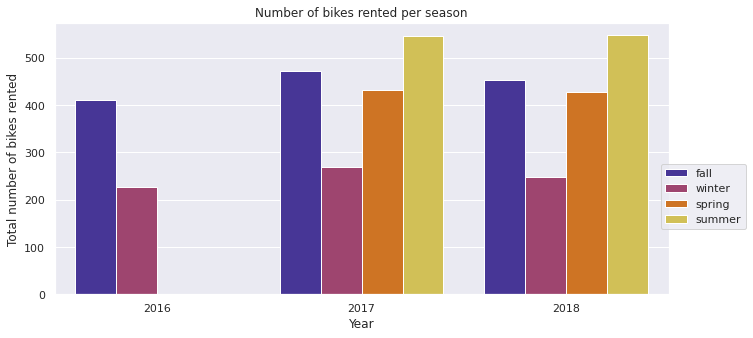

In [26]:
plt.figure(figsize=(11,5))
sns.barplot(x='year',y='rental',hue='season', data=bike_data,palette="CMRmap", ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.135,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')
plt.show()
# plt.savefig('bar_rentals_season.svg', format='svg', dpi=1200)
# plt.close()

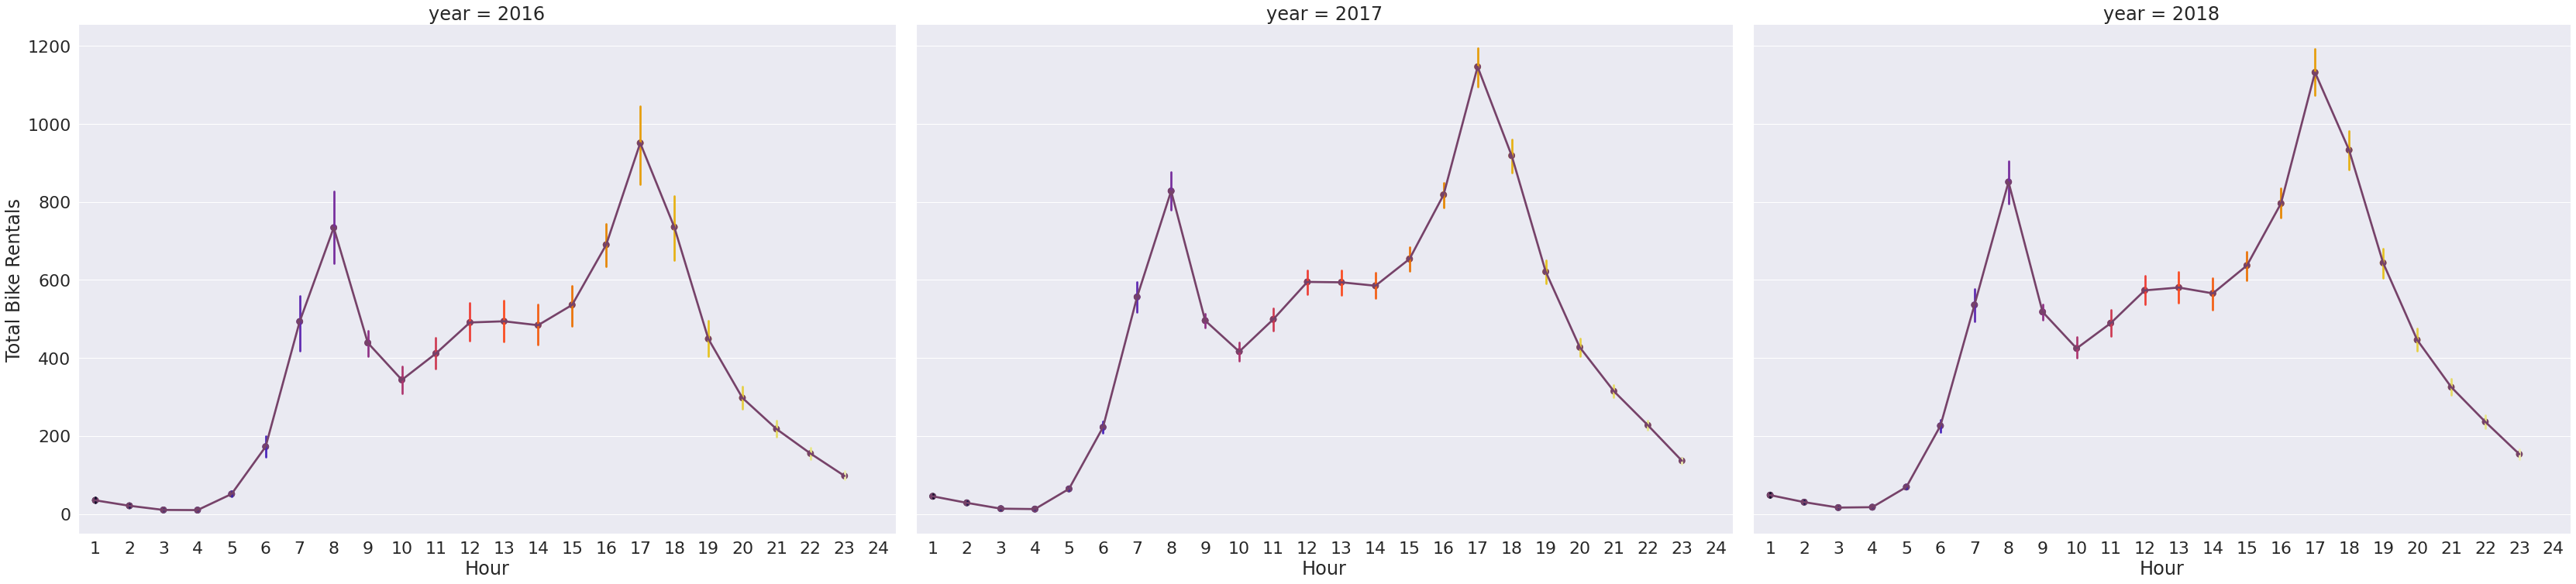

In [27]:
sns.set(font_scale=2)
g = sns.FacetGrid(data=bike_data, col="year", col_wrap=3,height=11, aspect=11.7/8.27, )
g.map(sns.pointplot, "hour", "rental", palette="CMRmap", order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
g.map(sns.pointplot, "hour", "rental",marker="",join=True, ci=None, color="#764269" ,order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
# g.set_titles(col_template = "Total Number of Bikes Rented per Month")
g.set_axis_labels(x_var="Hour", y_var="Total Bike Rentals")
g.savefig('hourly_data_yearly.svg', format='svg', dpi=1200)

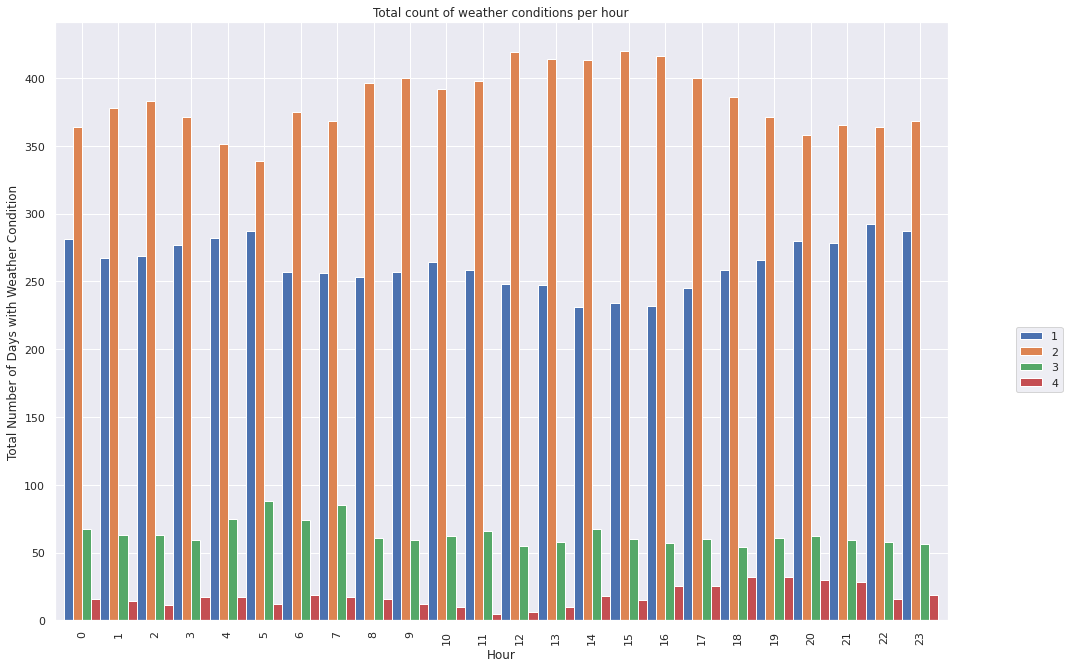

In [28]:
sns.set(font_scale=1)
plot = bike_data.groupby("hour")["weather"].value_counts()
plot.unstack().plot(figsize=(16,11),kind="bar", width=1)
plt.legend(loc='upper right',bbox_to_anchor=(1.135,0.5))
plt.xlabel('Hour')
plt.ylabel('Total Number of Days with Weather Condition')
plt.title('Total count of weather conditions per hour')
plt.show()

In [29]:
bike_data["weather"].value_counts()

2    9209
1    6306
3    1529
4     422
Name: weather, dtype: int64

In [30]:
plot.unstack()

weather    1    2   3   4
hour                     
0        281  364  67  16
1        267  378  63  14
2        269  383  63  11
3        277  371  59  17
4        282  351  75  17
5        287  339  88  12
6        257  375  74  19
7        256  368  85  17
8        253  396  61  16
9        257  400  59  12
10       264  392  62  10
11       258  398  66   5
12       248  419  55   6
13       247  414  58  10
14       231  413  67  18
15       234  420  60  15
16       232  416  57  25
17       245  400  60  25
18       258  386  54  32
19       266  371  61  32
20       280  358  62  30
21       278  365  59  28
22       292  364  58  16
23       287  368  56  19

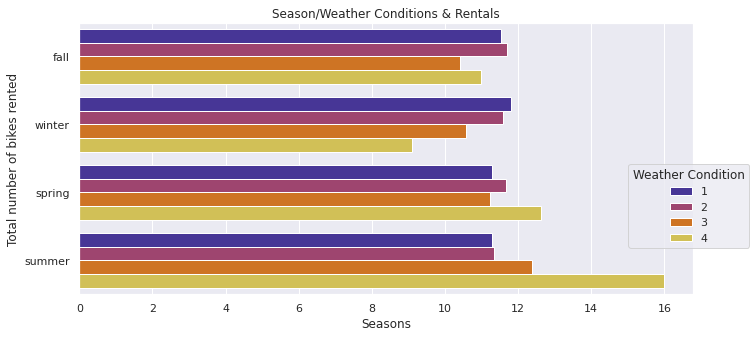

In [31]:
# seasonal_count =bike_data["weather"][bike_data["year"]==i].value_counts()
sns.set(font_scale=1)
plt.figure(figsize=(11,5))
sns.barplot(x="hour",y="season", data=bike_data,hue='weather',palette="CMRmap", ci=None)
plt.legend(title="Weather Condition", loc='upper right',bbox_to_anchor=(1.1,0.5))
plt.xlabel('Seasons')
plt.ylabel('Total number of bikes rented')
plt.title('Season/Weather Conditions & Rentals')
plt.show()
# plt.savefig('bar_weather_seasons.svg', format='svg', dpi=1200)
# plt.close()

In [32]:
sns.set(font_scale=2)
for i in bike_data["year"].unique():
  sns.catplot(x="month", y="rental",palette="CMRmap", kind="point", hue="weekend",data=bike_data[bike_data["year"]==i],height=11, aspect=11.7/8.27)
  plt.xlabel('Month')
  plt.ylabel('Total number of bikes rented')
  plt.title(f'Comparison of Bikes Rented during Week Day/End {i}')
  # plt.show()
  plt.savefig(f'bar_rentals_weekend{i}.svg', format='svg', dpi=1200)
  plt.close()

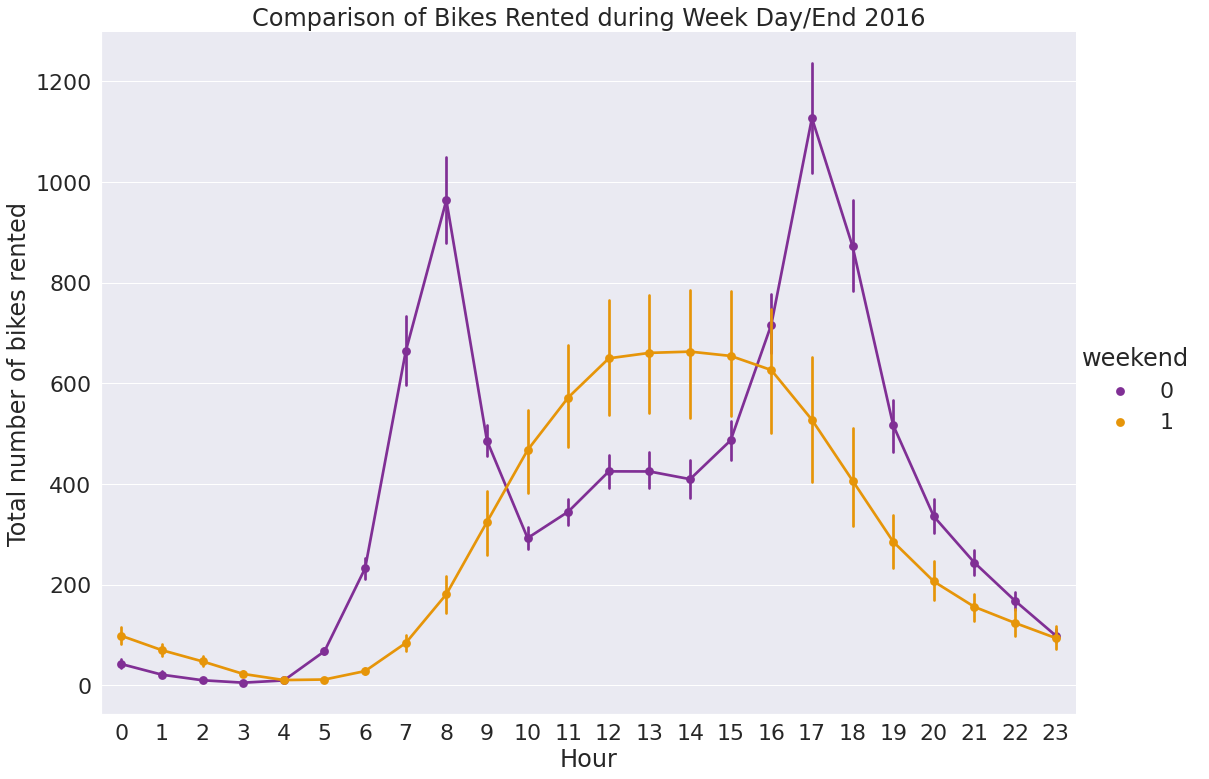

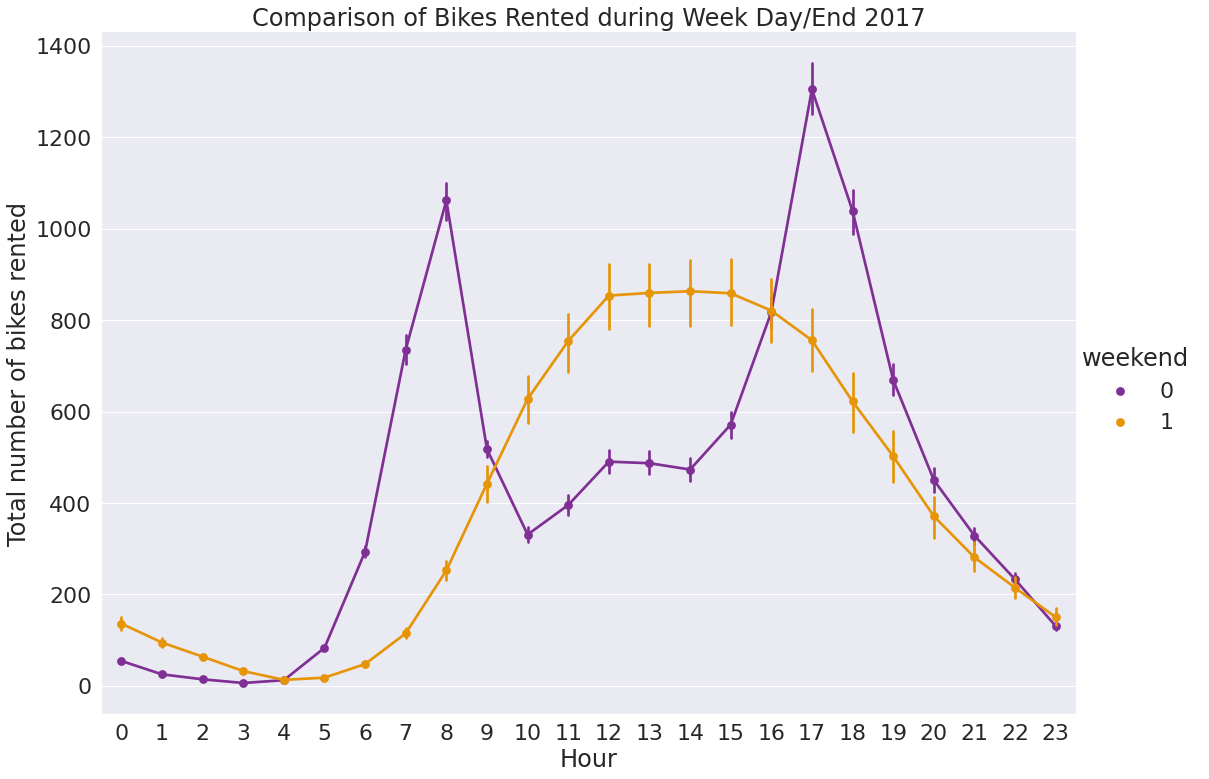

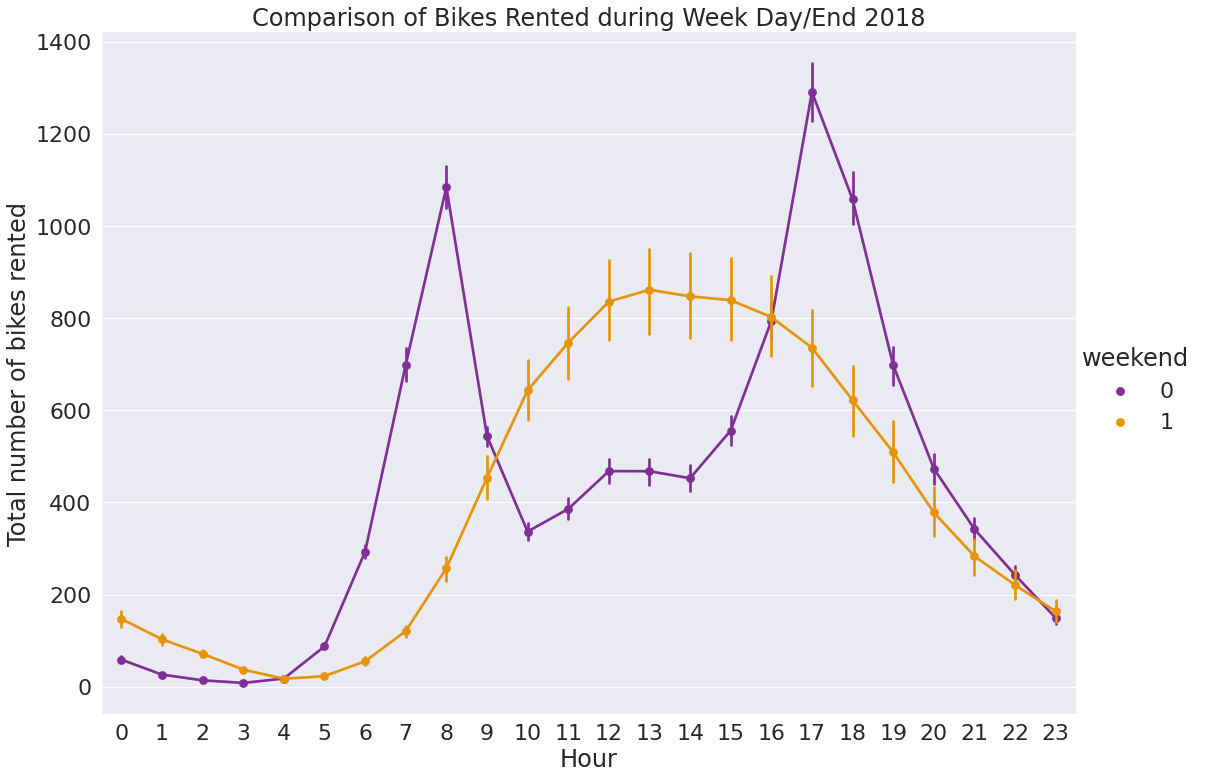

In [33]:
sns.set(font_scale=2)
for i in bike_data["year"].unique():
  sns.catplot(x="hour", y="rental",palette="CMRmap", kind="point", hue="weekend",data=bike_data[bike_data["year"]==i],height=11, aspect=11.7/8.27)
  plt.xlabel('Hour')
  plt.ylabel('Total number of bikes rented')
  plt.title(f'Comparison of Bikes Rented during Week Day/End {i}')
  plt.show()
  # plt.savefig(f'bar_rentals_weekend_hourly_{i}.svg', format='svg', dpi=1200)
  # plt.close()

In [34]:
new_members = bike_data[["member","rental", "year", "month"]]
new_members["casual"] = bike_data["rental"]-bike_data["member"]
new_members

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


member  rental  year  month  casual
0          80     103  2016     10      23
1          53      63  2016     10      10
2          27      33  2016     10       6
3          20      23  2016     10       3
4          11      11  2016     10       0
...       ...     ...   ...    ...     ...
17461     416     541  2018      9     125
17462     278     379  2018      9     101
17463     233     301  2018      9      68
17464     148     203  2018      9      55
17465      83     113  2018      9      30

[17466 rows x 5 columns]

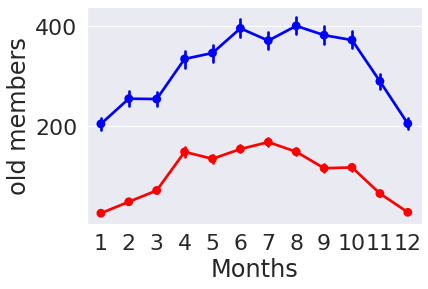

In [35]:
fig, ax1 = plt.subplots() # initializes figure and plots

# ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.pointplot(x = bike_data["month"], y = new_members["member"], color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.pointplot(x = bike_data["month"], y = new_members["casual"], marker = 'o', color = 'red') # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
ax1.set_xlabel('Months')
ax1.set_ylabel('old members')
# ax2.set_ylabel('new members', color='b')

plt.show(); # shows the plot. 
# plt.savefig('bar_rentals_weekend.svg', format='svg', dpi=1200)
# plt.close()

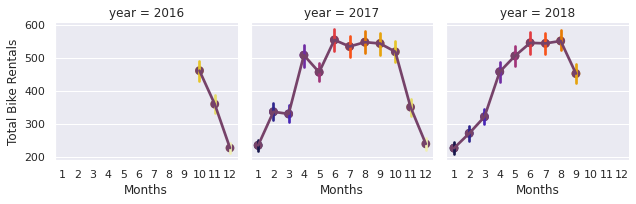

In [36]:
sns.set(font_scale=1)
g = sns.FacetGrid(data=bike_data, col="year" )
g.map(sns.pointplot, "month", "rental", palette="CMRmap", order=[1,2,3,4,5,6,7,8,9,10,11,12])
g.map(sns.pointplot, "month", "rental",marker="",join=True, ci=None, color="#764269" ,order=[1,2,3,4,5,6,7,8,9,10,11,12])
# g.set_titles(col_template = "Total Number of Bikes Rented per Month")
g.set_axis_labels(x_var="Months", y_var="Total Bike Rentals")
g.savefig('Total_Bike_Rentals_per_Month.svg', format='svg', dpi=1200)

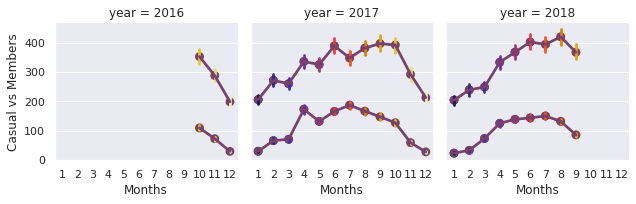

In [37]:
g = sns.FacetGrid(data=new_members, col="year" )
g.map(sns.pointplot, "month", "member", palette="CMRmap", order=[1,2,3,4,5,6,7,8,9,10,11,12])
g.map(sns.pointplot, "month", "member",marker="",join=True, ci=None, color="#764269", order=[1,2,3,4,5,6,7,8,9,10,11,12])
g.map(sns.pointplot, "month", "casual", palette="CMRmap",order=[1,2,3,4,5,6,7,8,9,10,11,12])
g.map(sns.pointplot, "month", "casual",marker="",join=True, ci=None, color="#764269",order=[1,2,3,4,5,6,7,8,9,10,11,12])
g.set_axis_labels(x_var="Months", y_var="Casual vs Members")
g.savefig('Casual_Members_Rentals_per_Month.svg', format='svg', dpi=1200)

In [38]:
bike_data["temperature"].describe()

count    17466.000000
mean        15.557475
std          9.794618
min        -12.780000
25%          7.780000
50%         16.670000
75%         23.890000
max         36.110000
Name: temperature, dtype: float64

In [39]:
bike_data["temperature"].apply(np.ceil)

0        19.0
1        18.0
2        18.0
3        18.0
4        18.0
         ... 
17461    22.0
17462    22.0
17463    22.0
17464    20.0
17465    20.0
Name: temperature, Length: 17466, dtype: float64

In [40]:
bike_data[bike_data["year"]==2017]

year  month  day  hour  ...  precip  precipaccum weather  rental
2207   2017      1    1     0  ...     0.0          0.0       2      77
2208   2017      1    1     1  ...     0.0          0.0       2      80
2209   2017      1    1     2  ...     0.0          0.0       1      62
2210   2017      1    1     3  ...     0.0          0.0       1      18
2211   2017      1    1     4  ...     0.0          0.0       1       5
...     ...    ...  ...   ...  ...     ...          ...     ...     ...
10943  2017     12   31    19  ...     0.0          0.0       1      59
10944  2017     12   31    20  ...     0.0          0.0       1      30
10945  2017     12   31    21  ...     0.0          0.0       1      46
10946  2017     12   31    22  ...     0.0          0.0       1      25
10947  2017     12   31    23  ...     0.0          0.0       1      14

[8741 rows x 17 columns]

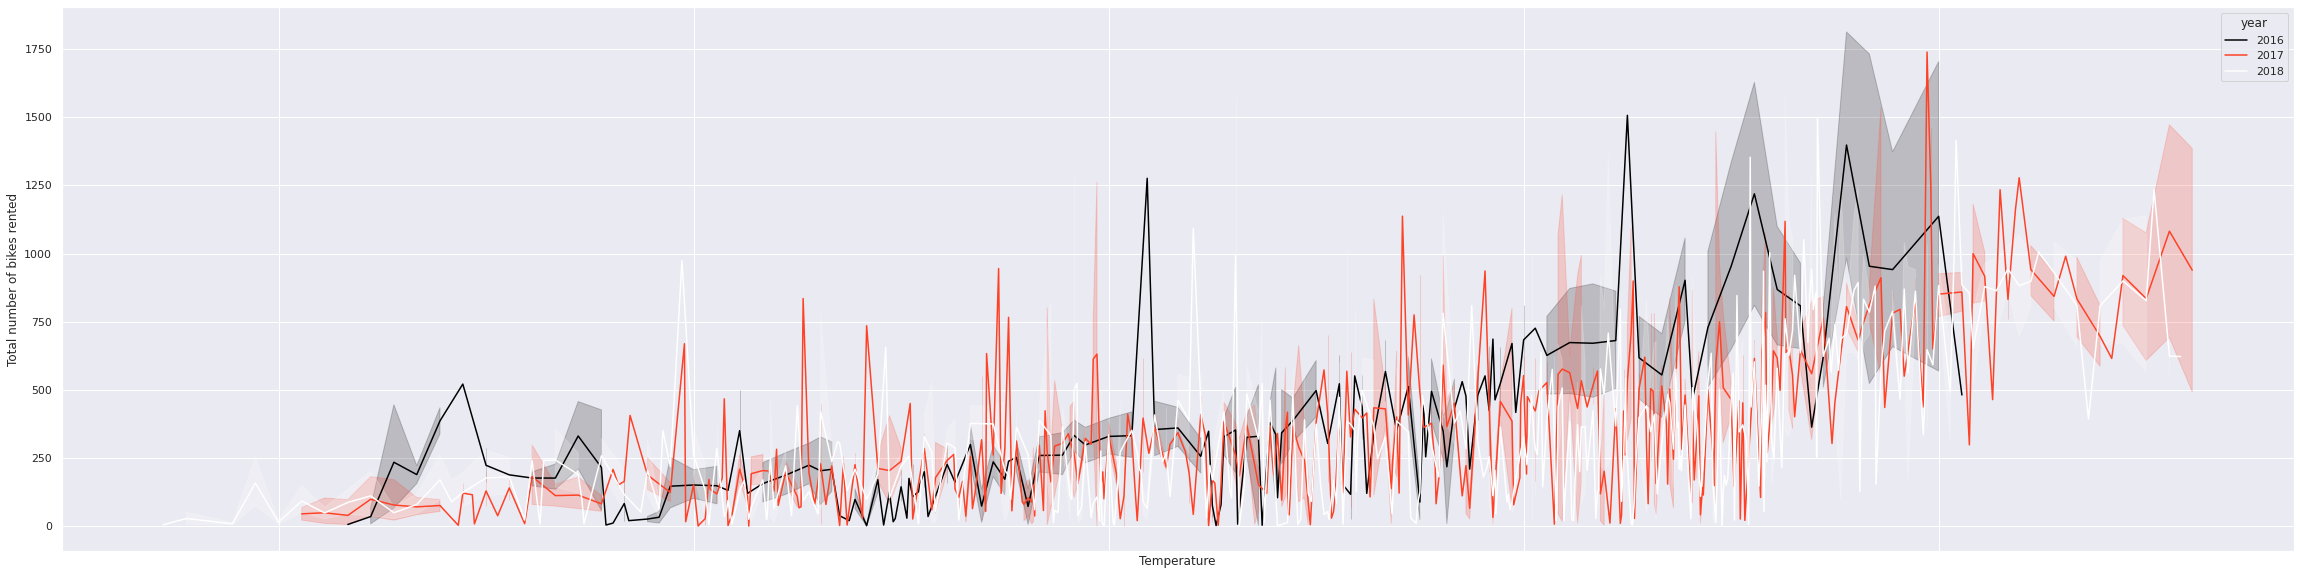

In [41]:
# fig, ax = plt.subplots()
plt.figure(figsize=(40,10))
plot_ = sns.lineplot(x="temperature", y="rental",hue="year",palette="CMRmap",data=bike_data[["temperature","rental", "year"]])
# sns.pointplot(
#     data=, x="temperature", y="rental", hue="year", ax=ax, palette="CMRmap")
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel("Temperature")
plt.ylabel("Total number of bikes rented")
ax.set(title="Distribution bike renting in different temperature")
plt.show()
# plt.savefig('Temperature_Rentals.svg', format='svg', dpi=1200)
# plt.close()

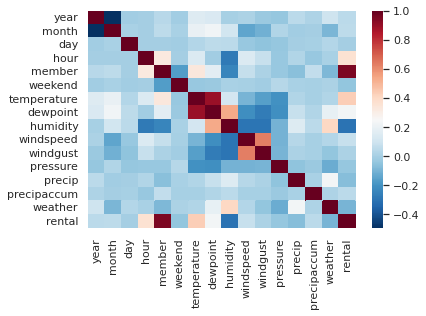

In [42]:
sns.heatmap(bike_data.corr(), cmap="RdBu_r")

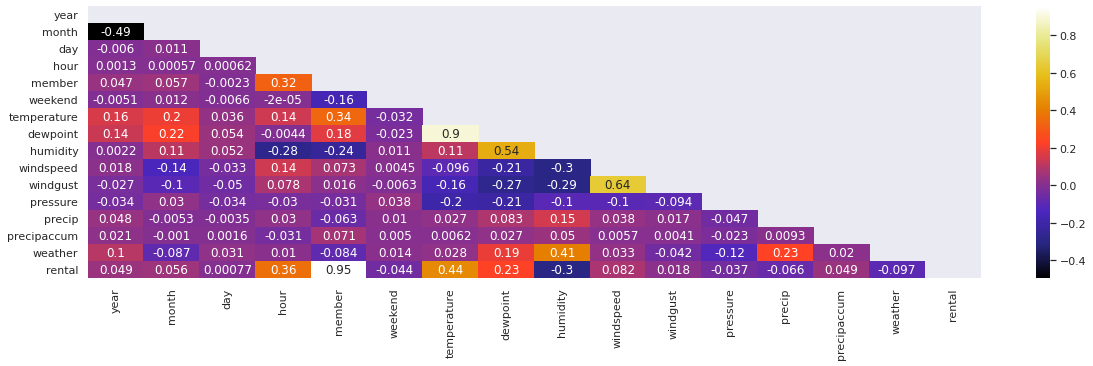

In [43]:
sns.set(font_scale=1)
plt.figure(figsize=(20,5))
mask = np.zeros_like(bike_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(bike_data.corr(),cmap='CMRmap',mask=mask, annot=True)
# plt.savefig('feature_correlation.svg', format='svg', dpi=1200)
# plt.close()

# LINEAR REGRESSION PHASE 1 USING ALL FEATURES

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [45]:
#factorizing dataset and preparing for modelling
df = bike_data.copy()
df["season"] = df["season"].factorize()[0]
df["season"].unique()

array([0, 1, 2, 3])

In [46]:
#Convert Numerical features to Categorical

for i in [
          'year', 
          'month', 
          'day', 
          'hour',
          'weekend', 
          'season',
          'weather',
]:
  df[i] = df[i].astype("category")

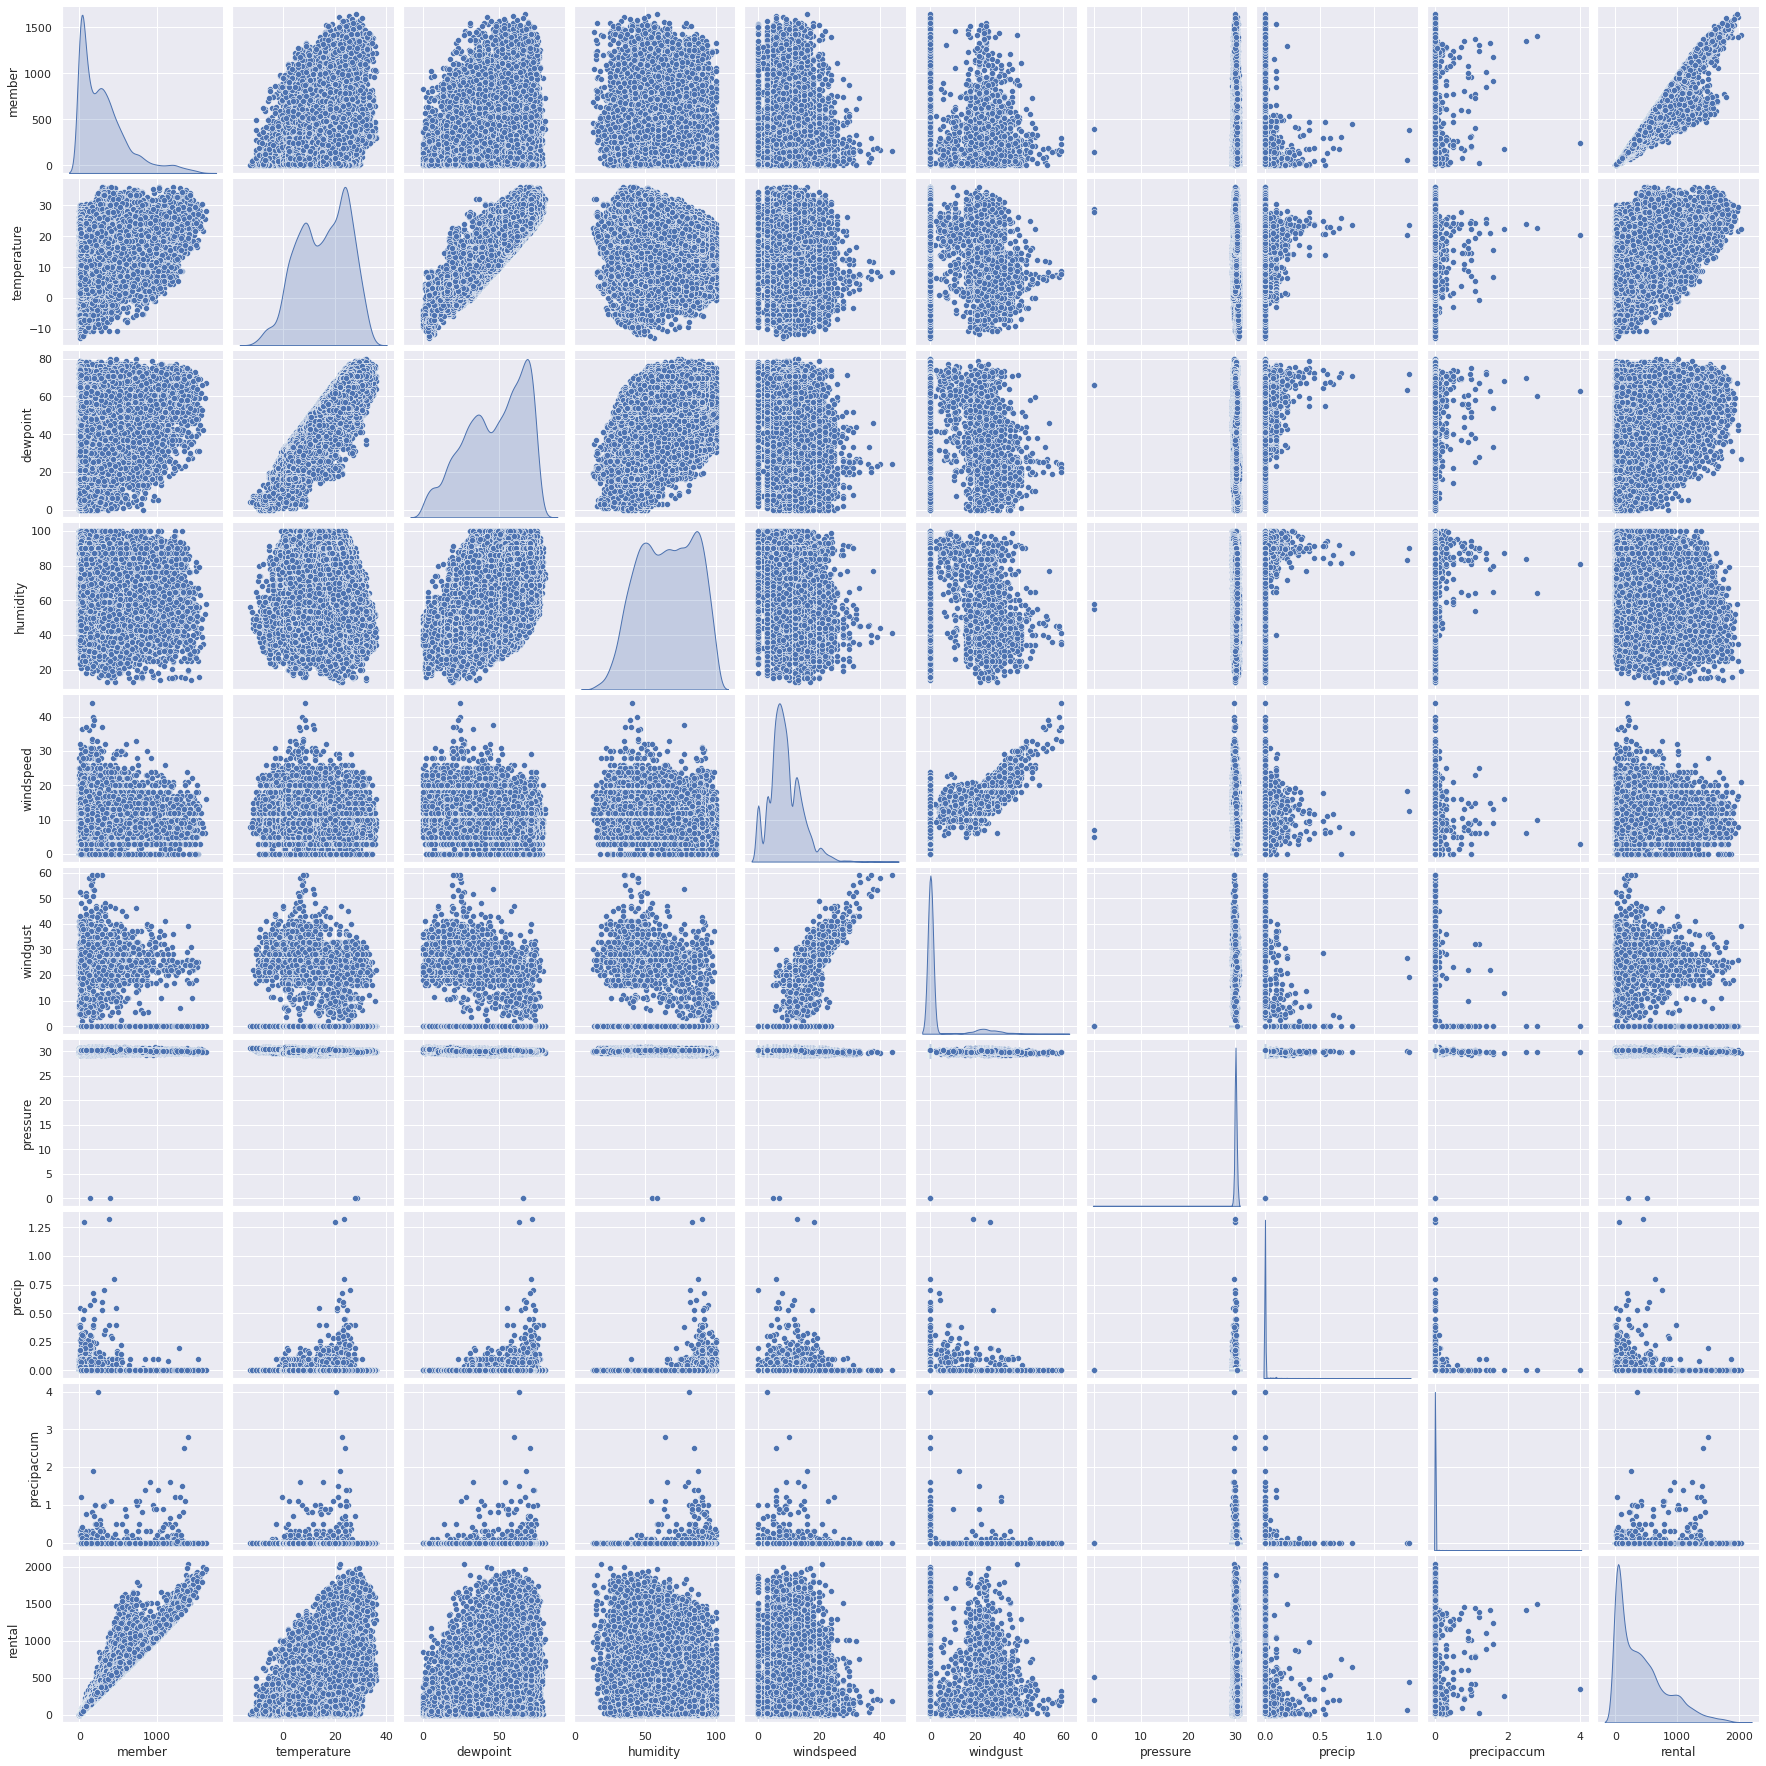

In [47]:
# Create a new dataframe of only numeric variables:

sns.pairplot(df, diag_kind='kde')
plt.show()

In [50]:
df.columns

Index(['year', 'month', 'day', 'hour', 'member', 'weekend', 'season',
       'temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'weather', 'rental'],
      dtype='object')

In [ ]:
# Create a new dataframe of only numeric variables:
bike_num=df[['season','member', 'temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'rental']]
sns.pairplot(bike_num, diag_kind='kde', palette="CMRmap", hue="season")
# plt.show()
plt.savefig('pair_plot_between_numeric_features.png', format='png', dpi=1200)
plt.close()

In [51]:
  bike_data.iloc[:,0:-1].values

array([[2016, 10, 1, ..., 0.0, 0.0, 3],
       [2016, 10, 1, ..., 0.0, 0.0, 3],
       [2016, 10, 1, ..., 0.0, 0.0, 3],
       ...,
       [2018, 9, 30, ..., 0.0, 0.0, 2],
       [2018, 9, 30, ..., 0.0, 0.0, 2],
       [2018, 9, 30, ..., 0.0, 0.0, 1]], dtype=object)

In [52]:
numeric = ['member','temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'rental']

In [53]:
df.head()

year month day hour  member  ... pressure precip  precipaccum  weather  rental
0  2016    10   1    0      80  ...     30.1    0.0          0.0        3     103
1  2016    10   1    1      53  ...     30.1    0.0          0.0        3      63
2  2016    10   1    2      27  ...     30.1    0.0          0.0        3      33
3  2016    10   1    3      20  ...     30.1    0.1          0.0        3      23
4  2016    10   1    4      11  ...     30.1    0.0          0.0        3      11

[5 rows x 17 columns]

In [54]:
df.describe()

member   temperature  ...   precipaccum        rental
count  17466.000000  17466.000000  ...  17466.000000  17466.000000
mean     317.602657     15.557475  ...      0.003845    420.144910
std      315.397551      9.794618  ...      0.065460    402.473513
min        0.000000    -12.780000  ...      0.000000      0.000000
25%       63.000000      7.780000  ...      0.000000     77.000000
50%      244.000000     16.670000  ...      0.000000    315.500000
75%      455.750000     23.890000  ...      0.000000    634.000000
max     1639.000000     36.110000  ...      4.000000   2038.000000

[8 rows x 10 columns]

In [55]:
# Training Set and Test Set
# y_train = df_train.pop('cnt')
# X_train = df_train
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1].values,
                                               df.iloc[:,-1].values,
                                               test_size=0.3, 
                                               shuffle=False)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
df.select_dtypes(["category"]).columns
cat = df.select_dtypes(["category"])

dummy = pd.get_dummies(cat)
dummy["id"] = dummy.index
num = df.select_dtypes(["float"])
num["id"] = num.index

complete = num.join(dummy, on="id", how="left", lsuffix="Index2")

target = df[["member", "rental"]]
target["id"] = target.index
complete["id"] = complete.index
complete

completeFinal = complete.join(target, on="id", how="left", lsuffix="Index2")
completeFinal = completeFinal.drop("id", 1)
completeFinal.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


temperature  dewpoint  humidity  ...  idIndex2  member  rental
0        18.33      65.0     100.0  ...         0      80     103
1        17.78      64.0     100.0  ...         1      53      63
2        17.78      64.0     100.0  ...         2      27      33
3        17.78      64.0     100.0  ...         3      20      23
4        17.78      64.0     100.0  ...         4      11      11

[5 rows x 92 columns]

In [58]:
week = completeFinal
week1 = week[week["weekend_0"] == 1]

week2 = week1.drop(["idIndex2", "member"], 1)

In [59]:
y = week["rental"]
X = week.drop("rental", 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

In [60]:
print(X_train)
print(y_train)

       temperature  dewpoint  humidity  ...  weather_4  idIndex2  member
0            18.33     65.00    100.00  ...          0         0      80
1            17.78     64.00    100.00  ...          0         1      53
2            17.78     64.00    100.00  ...          0         2      27
3            17.78     64.00    100.00  ...          0         3      20
4            17.78     64.00    100.00  ...          0         4      11
...            ...       ...       ...  ...        ...       ...     ...
12221         5.74     39.67     90.00  ...          0     12221      10
12222         5.83     40.00     90.50  ...          0     12222      10
12223         5.56     38.67     87.67  ...          0     12223       3
12224         5.56     39.00     89.00  ...          0     12224      10
12225         5.44     40.00     92.80  ...          0     12225      61

[12226 rows x 91 columns]
0        103
1         63
2         33
3         23
4         11
        ... 
12221     11
12222 

In [61]:
lr_weekday = LinearRegression().fit(X_train, y_train)

weekday_predict = lr_weekday.predict(X_test)

r2_score(y_test, weekday_predict)

0.9668278560432335

In [62]:
weekend = completeFinal
weekend1 = weekend[weekend["weekend_1"] == 1]

weekend2 = weekend1.drop(["idIndex2", "member"], 1)



In [63]:
y = weekend2["rental"]
X = weekend2.drop("rental", 1)

X_train_WKend, X_test_WKend, y_train_WKend, y_test_WKend = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

In [64]:
# Build a linear regression model with the TRAIN data
lr_weekend = LinearRegression().fit(X_train_WKend, y_train_WKend)

# Predict the Target variable for the TEST data using the above model
weekend_predictions = lr_weekend.predict(X_test_WKend)

# Find out the R2 value to evaluate the model
r2_score(y_test_WKend, weekend_predictions)

0.8239557678705345

# HYPERPARAMETER OPTIMIZATION

weekday Model

In [ ]:
gbm = GradientBoostingRegressor(learning_rate=0.1, random_state=1234)

pipe = Pipeline([("gbm", gbm)])

cv = TimeSeriesSplit(n_splits=10)

gbm_cv = GridSearchCV(
    pipe,
    dict(gbm__n_estimators=[800, 1000, 1200], gbm__max_depth=[2, 3, 4, 5]),
    cv=cv,
    verbose=500,
)

gbm_cv.fit(X_train, y_train)

gbmPredictions_weekends = gbm_cv.predict(X_test)

r2_score(y_test, gbmPredictions_weekends)

In [ ]:
gbm_cv.best_params_

weekend model

In [ ]:
gbm = GradientBoostingRegressor(learning_rate=0.1, random_state=1234)
pipe = Pipeline([("gbm", gbm)])

cv = TimeSeriesSplit(n_splits=10)
gbm_cv = GridSearchCV(
    pipe,
    dict(gbm__n_estimators=[1000, 1200, 1400], gbm__max_depth=[2, 3, 4]),
    cv=cv,
    verbose=500,
)

gbm_cv.fit(X_train_WKend, y_train_WKend)
gbmPredictions_weekdays = gbm_cv.predict(X_test_WKend)
r2_score(y_test_WKend, gbmPredictions_weekdays)

In [ ]:
gbm_cv.best_params_

In [ ]:
weekends_predict = pd.Series(
    gbmPredictions_weekends, index=y_test_WKend.index.values
)

weekdays_predict = pd.Series(
    gbmPredictions_weekdays, index=y_test.index.values
)

predictions = pd.concat(
    [weekends_predict, weekdays_predict]
).sort_index()

In [ ]:
weekends_true = pd.Series(y_test_Wkend)

weekdays_true = pd.Series(y_test)

true_y = pd.concat([weekdays_predict, weekends_predict]).sort_index()

In [ ]:
r2_score(true_y, predictions)

# Second Method LR2 MinMaxScaling Total Data

In [77]:
#factorizing dataset and preparing for modelling
df = bike_data.copy()
df["season"] = df["season"].factorize()[0]
df["season"].unique()

array([0, 1, 2, 3])

In [79]:
numeric = ['member','temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'rental']

In [80]:
# NORMALIZING OR SCALING DATASET INCREASE MODEL EFFICIENCY 
# AND REDUCE COMPUTATIONAL NEED
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric] = scaler.fit_transform(df[numeric]) 

In [84]:
#Split the dataset into the train and test data
X_train3,X_test3,y_train3,y_test3=train_test_split(df.iloc[:,0:-1].values,
                                               df.iloc[:,-1].values,
                                               test_size=0.3,
                                               shuffle=False)

print(X_train3.shape,X_test3.shape,y_train3.shape,y_test3.shape)

(12226, 16) (5240, 16) (12226,) (5240,)


In [85]:
#training model
lr_model=LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#fit the trained model
lr_model.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
X_test3

array([[2.018e+03, 2.000e+00, 2.300e+01, ..., 0.000e+00, 0.000e+00,
        3.000e+00],
       [2.018e+03, 2.000e+00, 2.300e+01, ..., 0.000e+00, 7.500e-03,
        3.000e+00],
       [2.018e+03, 2.000e+00, 2.300e+01, ..., 0.000e+00, 0.000e+00,
        3.000e+00],
       ...,
       [2.018e+03, 9.000e+00, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [2.018e+03, 9.000e+00, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [2.018e+03, 9.000e+00, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [88]:
predict3 = lr_model.predict(X_test3)

In [89]:
predict3

array([0.06085869, 0.16544911, 0.32013882, ..., 0.21734799, 0.15935542,
       0.12213589])

In [90]:
#Accuracy of the model
lr=lr_model.score(X_train3,y_train3)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.9467071138923815
Model coefficients : [ 5.79471842e-05 -7.79022737e-04  5.46054414e-05  5.58903916e-04
  9.07447504e-01  4.66323663e-02 -8.57590407e-04  2.72040641e-01
 -9.11396189e-02 -4.12238573e-02 -8.44957417e-03  4.07402123e-03
  5.82115372e-01  2.05120096e-02 -1.02027035e-01  4.54337624e-03]
Model intercept value : -0.7502788841720025


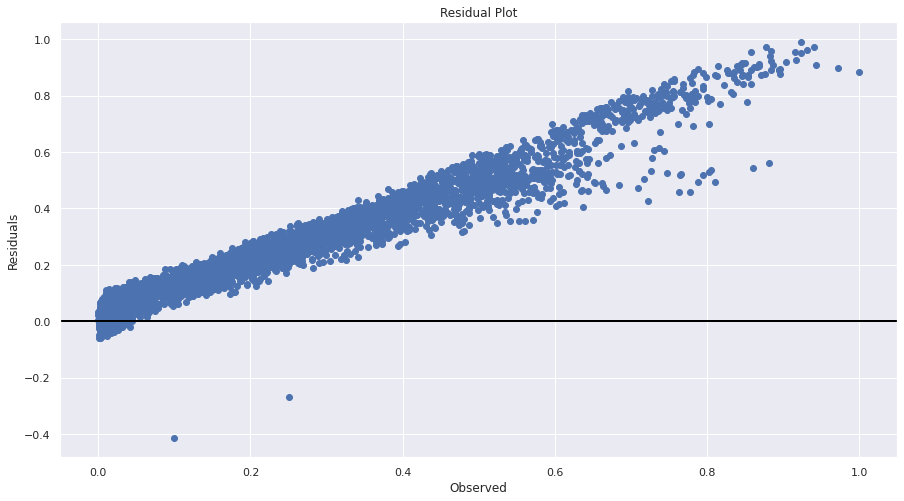

In [91]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test3, predict3)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

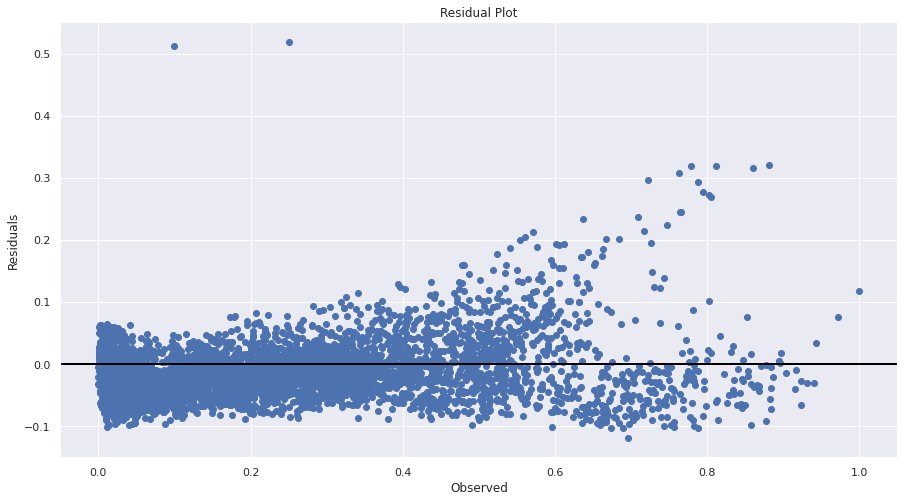

In [95]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test3, y_test3-predict3)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

# DECECISION TREE USING ALL FEATURES

In [96]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [97]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.9372746772895195


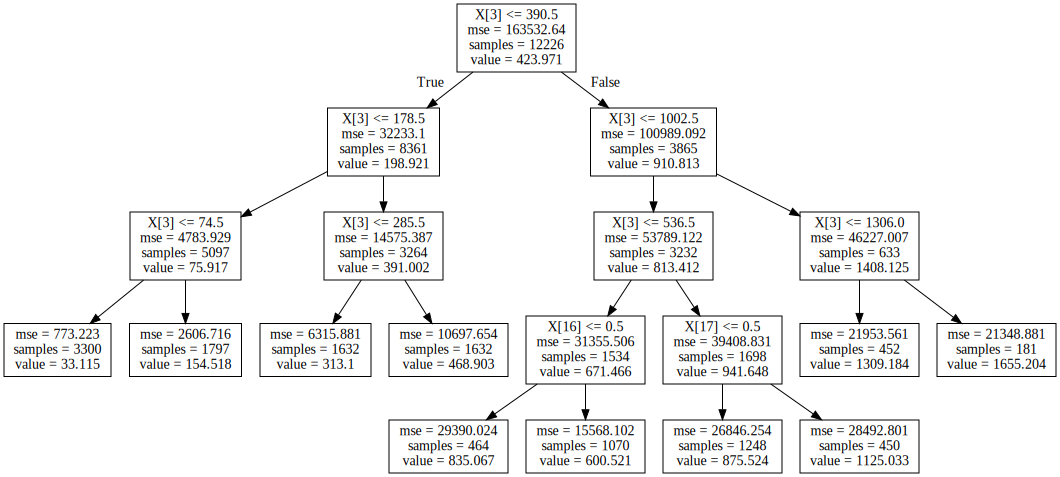

In [ ]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([443.37790698,  69.49769302, 973.10147992, ..., 827.3630137 ,
       307.74902724, 307.74902724])

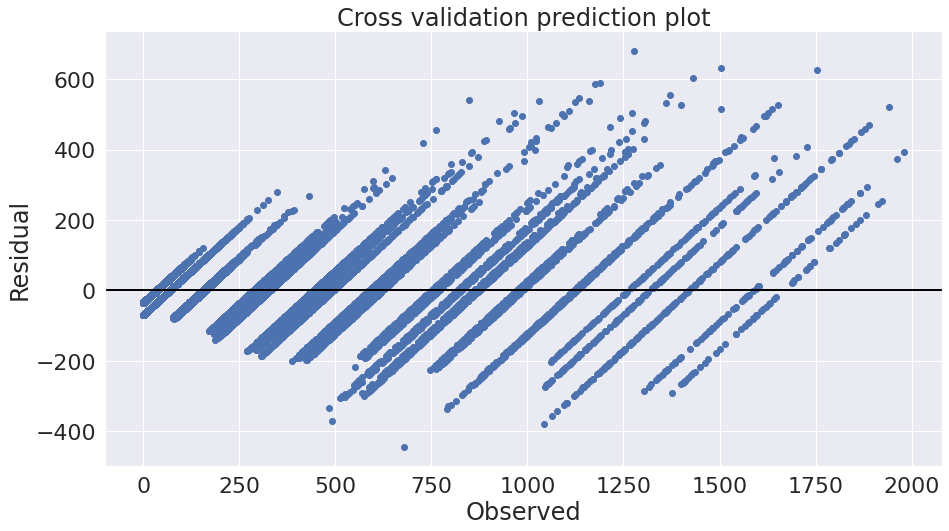

In [ ]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.9356248873405377


In [ ]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([600.52149533, 154.5180857 ,  33.11484848, ..., 154.5180857 ,
        33.11484848, 154.5180857 ])

In [ ]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 100.81397549257174
Mean absolute error : 69.13991386658178


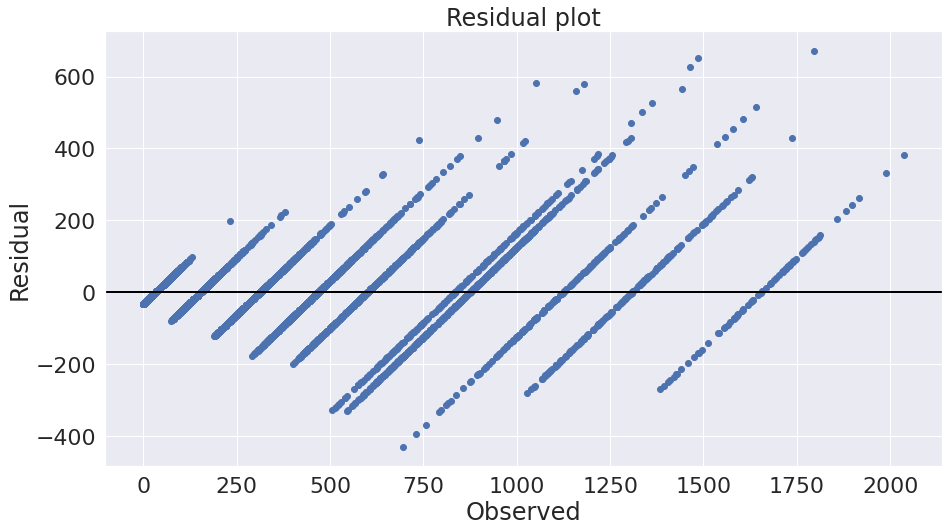

In [ ]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

# FEATURE SELECTION PCA & T-SNE

In [116]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [117]:
from sklearn.model_selection import train_test_split
bike_data.keys()

Index(['year', 'month', 'day', 'hour', 'member', 'weekend', 'season',
       'temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'weather', 'rental'],
      dtype='object')

In [118]:
df = bike_data.copy()
df["season"] = df["season"].factorize()[0]
df["season"].unique()

array([0, 1, 2, 3])

In [119]:
df.describe()

year         month  ...       weather        rental
count  17466.000000  17466.000000  ...  17466.000000  17466.000000
mean    2017.246822      6.522902  ...      1.774820    420.144910
std        0.662303      3.451445  ...      0.703245    402.473513
min     2016.000000      1.000000  ...      1.000000      0.000000
25%     2017.000000      4.000000  ...      1.000000     77.000000
50%     2017.000000      7.000000  ...      2.000000    315.500000
75%     2018.000000     10.000000  ...      2.000000    634.000000
max     2018.000000     12.000000  ...      4.000000   2038.000000

[8 rows x 17 columns]

In [120]:
df.isnull().sum()

year           0
month          0
day            0
hour           0
member         0
weekend        0
season         0
temperature    0
dewpoint       0
humidity       0
windspeed      0
windgust       0
pressure       0
precip         0
precipaccum    0
weather        0
rental         0
dtype: int64

In [121]:
target = df["rental"]
df = df.drop("rental", axis=1)

In [122]:
# Turn dataframe into arrays
X = df.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 17466 samples in 0.082s...
[t-SNE] Computed neighbors for 17466 samples in 1.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17466
[t-SNE] Computed conditional probabilities for sample 2000 / 17466
[t-SNE] Computed conditional probabilities for sample 3000 / 17466
[t-SNE] Computed conditional probabilities for sample 4000 / 17466
[t-SNE] Computed conditional probabilities for sample 5000 / 17466
[t-SNE] Computed conditional probabilities for sample 6000 / 17466
[t-SNE] Computed conditional probabilities for sample 7000 / 17466
[t-SNE] Computed conditional probabilities for sample 8000 / 17466
[t-SNE] Computed conditional probabilities for sample 9000 / 17466
[t-SNE] Computed conditional probabilities for sample 10000 / 17466
[t-SNE] Computed conditional probabilities for sample 11000 / 17466
[t-SNE] Computed conditional probabilities for sample 12000 / 17466
[t-SNE] Computed conditional probabilities for sa

In [123]:
print(pca_2d.shape)
print(tsne_results.shape)

(17466, 2)
(17466, 2)


In [124]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
# plt.show()
plt.savefig('PCA_TSNE.svg', format='svg', dpi=1200)
plt.close()

In [125]:
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(X)

In [126]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs = pca_3d[:,0],
    ys = pca_3d[:,1],
    zs = pca_3d[:,2],
    c = target,
    cmap='tab10'
)
# plt.show()
plt.savefig('PCA_3d.svg', format='svg', dpi=1200)
plt.close()